## Computer Vision Projects : skin detection 
#### Melika Heydari Rad 

This is an implementation of the skin detection propesed algorithm from the paper: https://arxiv.org/abs/1708.02694  
#### The proposed algorithm for finding the skin mask is as follows:  
  
0.0 <= H <= 50.0 and 0.23 <= S <= 0.68 and  
R > 95 and G > 40 and B > 20 and R > G and R > B  
and | R - G | > 15 and A > 15  
##### OR
R > 95 and G > 40 and B > 20 and R > G and R > B  
and | R - G | > 15 and A > 15 and Cr > 135 and  
Cb > 85 and Y > 80 and Cr <= (1.5862*Cb)+20 and  
Cr>=(0.3448*Cb)+76.2069 and  
Cr >= (-4.5652*Cb)+234.5652 and  
Cr <= (-1.15*Cb)+301.75 and  
Cr <= (-2.2857*Cb)+432.85nothing  
(H : Hue ; S: Saturation ; R : Red ; B: Blue ; G : Green ; Cr, Cb : Chrominance components ; Y : luminance component )

#### To implement this, we create two masks and then take the the union of them to create the final mask. 

___

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(cv2.__version__)
print(np.__version__)

4.8.0
1.23.4


___

In [27]:
import cv2
import numpy as np

# Load the image
original_img = cv2.imread('images/OprahWinfrey.jpg')

# noise removal
img = cv2.medianBlur(original_img, 5)

# converting image to hsv and ycrcb color spaces
bgr = img.copy()
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

In [28]:
print(bgr.shape, hsv.shape, ycrcb.shape)

(625, 500, 3) (625, 500, 3) (625, 500, 3)


Text(0.5, 1.0, 'noise removed image')

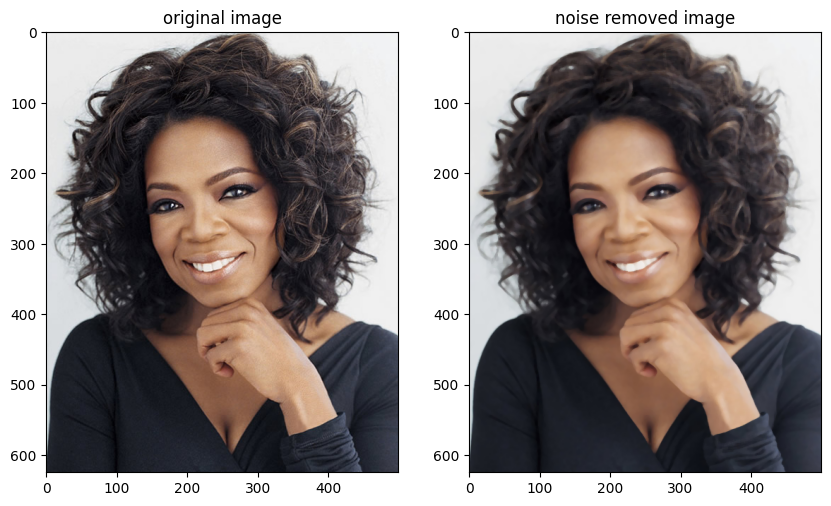

In [29]:
plt.figure(figsize=(10,6))
plt.subplot(121); plt.imshow(original_img[:,:,::-1]); plt.title('original image')
plt.subplot(122); plt.imshow(img[:,:,::-1]); plt.title('noise removed image')

___

two masks (first_mask and second_mask) should be created, and then the union of them makes the final mask. 

### 1. Creating the first mask

0.0 <= H <= 50.0 and 0.23 <= S <= 0.68  
and R > 95 and G > 40 and B > 20   
and R > G and R > B  and | R - G | > 15 

In [30]:
# scaling S channel 
# 0.23 * 255 = 58.65
# 0.68 * 255 = 173.4

In [31]:
# defining the kernel for morphology task
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

In [32]:
# creating hsv mask

# 0.0 <= H <= 50.0 and 0.23 <= S <= 0.68
hsv_mask = cv2.inRange(hsv, (0, 58, 0), (50,174,255)) 
hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_OPEN, kernel)
hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_CLOSE, kernel)

In [33]:
# creating bgr mask

# R > 95 and G > 40 and B > 20
bgr_mask = cv2.inRange(bgr, (20,40,95), (255,255,255)) 
bgr_mask = cv2.morphologyEx(bgr_mask, cv2.MORPH_OPEN, kernel)
bgr_mask = cv2.morphologyEx(bgr_mask, cv2.MORPH_CLOSE, kernel)

# get a copy of the mask until now for later visualization
bgr_mask_ranged = bgr_mask.copy()

# R > G and R > B and | R - G | > 15 
idx1 = bgr[:,:,2]>bgr[:,:,1]
idx2 = bgr[:,:,2]>bgr[:,:,0]
idx3 = (bgr[:,:,2]-bgr[:,:,1])>15
idx = (idx1 & idx2 & idx3).astype('uint8')

bgr_mask = cv2.bitwise_and(bgr_mask, idx)

In [34]:
first_mask = cv2.bitwise_and(hsv_mask, bgr_mask)

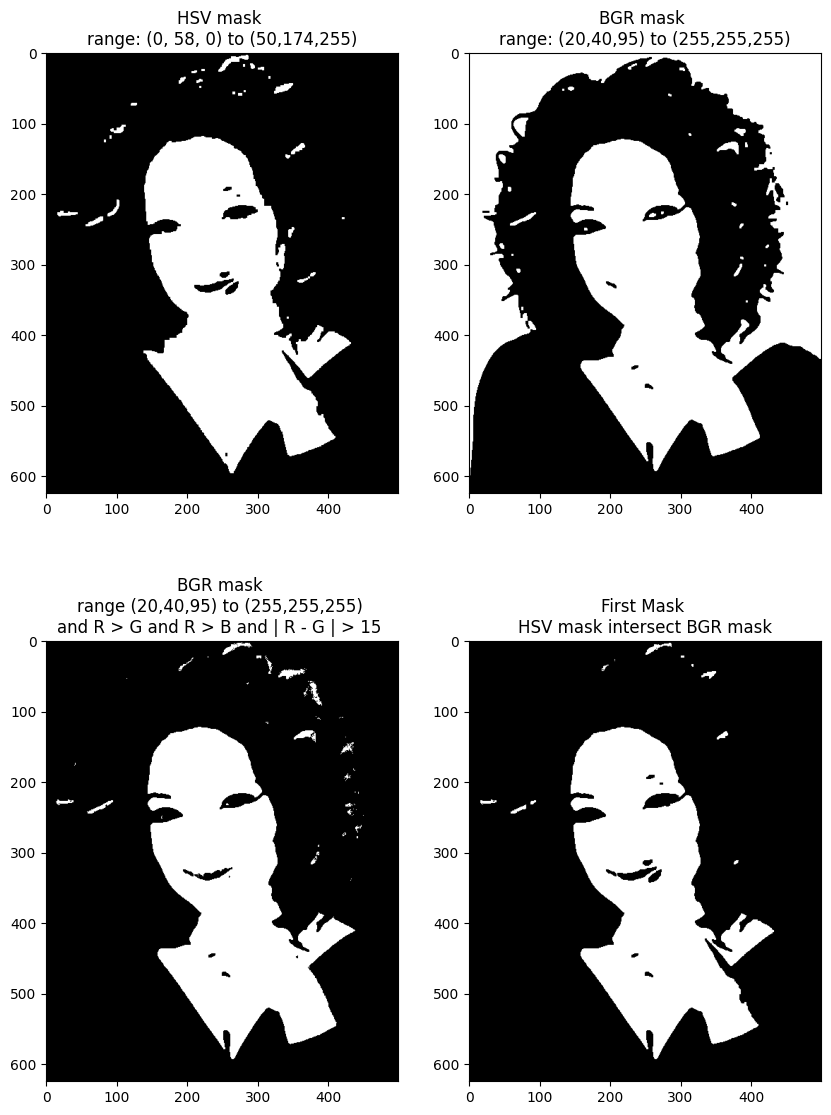

In [35]:
plt.figure(figsize = (10,14))
plt.subplot(221); plt.imshow(hsv_mask, cmap='gray'); plt.title('HSV mask \nrange: (0, 58, 0) to (50,174,255)');
plt.subplot(222); plt.imshow(bgr_mask_ranged, cmap='gray'); plt.title('BGR mask \nrange: (20,40,95) to (255,255,255)');
plt.subplot(223); plt.imshow(bgr_mask, cmap='gray'); plt.title('BGR mask \nrange (20,40,95) to (255,255,255) \nand R > G and R > B and | R - G | > 15 ');
plt.subplot(224); plt.imshow(first_mask, cmap='gray'); plt.title('First Mask \nHSV mask intersect BGR mask');

___

### 2. Creating the second mask

R > 95 and G > 40 and B > 20 and R > G and R > B  and | R - G | > 15   
and Cr > 135  and Cb > 85 and Y > 80  
and Cr <= (1.5862*Cb)+20   
and Cr>=(0.3448*Cb)+76.2069   
and Cr >= (-4.5652*Cb)+234.5652   
and Cr <= (-1.15*Cb)+301.75 and  
and Cr <= (-2.2857*Cb)+432.85nothing  

In [36]:
# R > 95 and G > 40 and B > 20 and R > G and R > B and | R - G | > 15
# the same as BGR mask  

In [37]:
# Cr > 135 and Cb > 85 and Y > 80
ycrcb_mask= cv2.inRange(ycrcb, (80,135,85), (255,255,255)) 
ycrcb_mask= cv2.morphologyEx(ycrcb_mask, cv2.MORPH_OPEN, kernel)
ycrcb_mask= cv2.morphologyEx(ycrcb_mask, cv2.MORPH_CLOSE, kernel)

# get a copy of the mask until now for later visualization
ycrcb_mask_ranged = ycrcb_mask.copy()

# rest of the conditions
Cr = ycrcb[:,:,1]
Cb = ycrcb[:,:,2]

idx = ((Cr<=(1.5862*Cb)+20)&(Cr>=(0.3448*Cb)+76.2069)&(Cr>=(-4.5652*Cb)+234.5652) \
      &(Cr<=(-1.15*Cb)+301.75)&(Cr<=(-2.2857*Cb)+432.85)).astype('uint8')

ycrcb_mask = cv2.bitwise_and(ycrcb_mask, idx)

In [38]:
second_mask = cv2.bitwise_and(bgr_mask, ycrcb_mask)

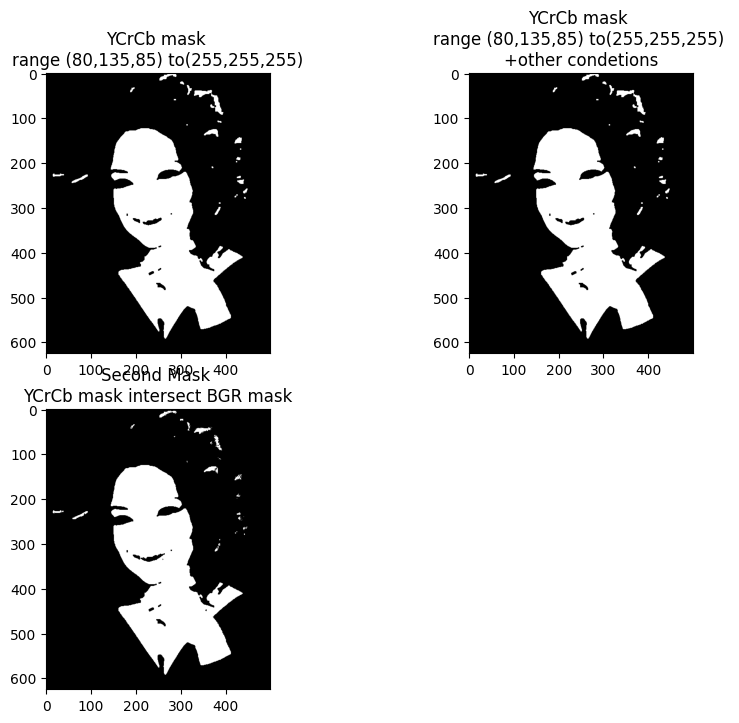

In [39]:
plt.figure(figsize = (10,8))
plt.subplot(221); plt.imshow(ycrcb_mask_ranged, cmap='gray'); plt.title('YCrCb mask \nrange (80,135,85) to(255,255,255)');
plt.subplot(222); plt.imshow(ycrcb_mask, cmap='gray'); plt.title('YCrCb mask \nrange (80,135,85) to(255,255,255) \n+other condetions');
plt.subplot(223); plt.imshow(second_mask, cmap='gray'); plt.title('Second Mask \nYCrCb mask intersect BGR mask');

___

### 3. Creating the final mask, and applying it on the image

In [40]:
# Creating the final mask 
final_mask = cv2.bitwise_or(first_mask, second_mask)

# applying the final mask on the original image
detected_skin = cv2.bitwise_and(original_img, original_img, mask=final_mask)

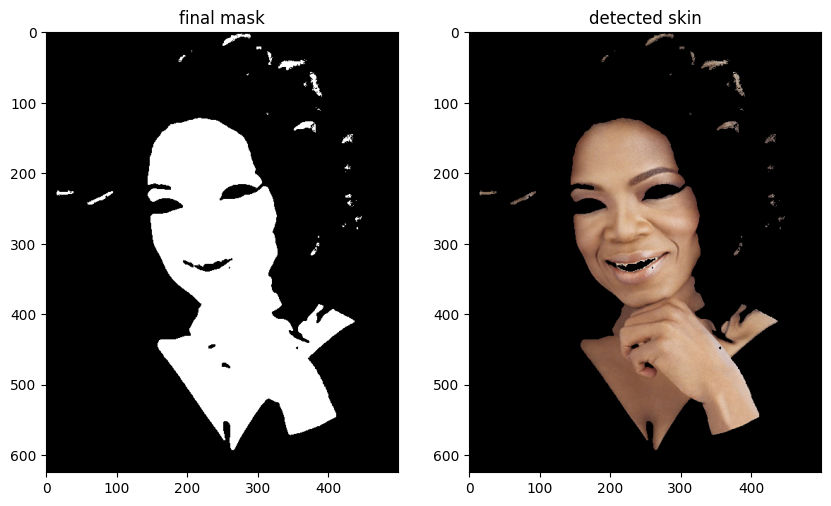

In [41]:
# visualizing the final mask and the detected skin
plt.figure(figsize=(10,6))
plt.subplot(121); plt.imshow(final_mask, cmap='gray'); plt.title('final mask');
plt.subplot(122); plt.imshow(detected_skin[:,:,::-1]); plt.title('detected skin');

In [42]:
# visualizaing by opencv
cv2.imshow('final mask', final_mask*255)
cv2.waitKey(0)
cv2.destroyAllWindows()

___

### 4. The whole code as once:

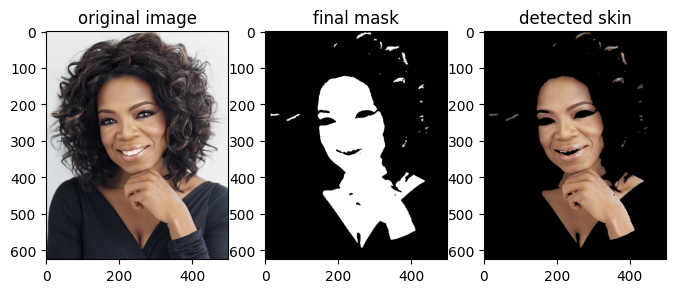

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load the image
original_img = cv2.imread('images/OprahWinfrey.jpg')

# noise removal
img = cv2.medianBlur(original_img, 5)

# converting image to hsv and ycrcb color spaces
bgr = img.copy()
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)


### creating the first mask 

# defining the kernel for later morphology task
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

## creating hsv mask

# 0.0 <= H <= 50.0 and 0.23 <= S <= 0.68
hsv_mask = cv2.inRange(hsv, (0, 58, 0), (50,174,255)) 
hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_OPEN, kernel)
hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_CLOSE, kernel)

## creating bgr mask

# R > 95 and G > 40 and B > 20
bgr_mask = cv2.inRange(bgr, (20,40,95), (255,255,255)) 
bgr_mask = cv2.morphologyEx(bgr_mask, cv2.MORPH_OPEN, kernel)
bgr_mask = cv2.morphologyEx(bgr_mask, cv2.MORPH_CLOSE, kernel)

# R > G and R > B and | R - G | > 15 
idx1 = bgr[:,:,2]>bgr[:,:,1]
idx2 = bgr[:,:,2]>bgr[:,:,0]
idx3 = (bgr[:,:,2]-bgr[:,:,1])>15
idx = (idx1 & idx2 & idx3).astype('uint8')

bgr_mask = cv2.bitwise_and(bgr_mask, idx)

first_mask = cv2.bitwise_and(hsv_mask, bgr_mask)

### creating the second mask

# Cr > 135 and Cb > 85 and Y > 80
ycrcb_mask= cv2.inRange(ycrcb, (80,135,85), (255,255,255)) 
ycrcb_mask= cv2.morphologyEx(ycrcb_mask, cv2.MORPH_OPEN, kernel)
ycrcb_mask= cv2.morphologyEx(ycrcb_mask, cv2.MORPH_CLOSE, kernel)

# rest of the conditions
Cr = ycrcb[:,:,1]
Cb = ycrcb[:,:,2]

idx = ((Cr<=(1.5862*Cb)+20)&(Cr>=(0.3448*Cb)+76.2069)&(Cr>=(-4.5652*Cb)+234.5652) \
      &(Cr<=(-1.15*Cb)+301.75)&(Cr<=(-2.2857*Cb)+432.85)).astype('uint8')

ycrcb_mask = cv2.bitwise_and(ycrcb_mask, idx)

second_mask = cv2.bitwise_and(bgr_mask, ycrcb_mask)

### Creating the final mask 
final_mask = cv2.bitwise_or(first_mask, second_mask)

# applying the final mask on the original image
detected_skin = cv2.bitwise_and(original_img, original_img, mask=final_mask)

# visualizing
cv2.imshow('oringinal image', original_img)
cv2.imshow('final mask', final_mask*255)
cv2.imshow('detected skin', detected_skin)
cv2.waitKey()
cv2.destroyAllWindows()

plt.figure(figsize=(8,8))
plt.subplot(131); plt.imshow(original_img[:,:,::-1]); plt.title('original image');
plt.subplot(132); plt.imshow(final_mask, cmap='gray'); plt.title('final mask');
plt.subplot(133); plt.imshow(detected_skin[:,:,::-1]); plt.title('detected skin');
